## Project 1: Chicago Train Ridership (using Python)

by Bashar Mohammad, 25 December 2021.

We will use Chicago train ridership datasetcollected over the period between 2001 and 2016. It covers 147 stations across Chicago.Two of them are located at o'Hare and Midway airports. 

On the rail system, a customer is counted as an "entry" each time he or she passes through a turnstile to enter a station.  Customers are not counted as "entries" when they make a "cross-platform" transfer from one rail line to another, since they don't pass through a turnstile. Where the number given for rail is in "boardings," what's presented is a statistically valid estimate of the actual number of boardings onto the rail system. 


The following analysis will address the following questions: 


- What are the ten stations with the lowest/highest total ridership?

- Which month does have the lowest/highest ridership across stations?

- Which station is busier: O'Hare aIrport or Midway airport? and how to fix the problem that they have different data size?

- Compute the correlation between the riderships for the two airport stations?

In [43]:
len(df.stationname.unique())

147

In [1]:
clear all

In [2]:
# import packages
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor, Button
import mplcursors
import numpy as np

In [3]:
df=pd.read_csv('Entries.csv')
df.head()

,station_id,stationname,date,daytype,rides
0,40010,Austin-Forest Park,01/01/2001,U,290
1,40020,Harlem-Lake,01/01/2001,U,633
2,40030,Pulaski-Lake,01/01/2001,U,483
3,40040,Quincy/Wells,01/01/2001,U,374
4,40050,Davis,01/01/2001,U,804


In [4]:
df[df.stationname=='Clark/Lake']['rides'].sum()

79426161

In [5]:
df.dtypes

station_id      int64
stationname    object
date           object
daytype        object
rides           int64
dtype: object

We definitely need to change the values in the 'date' column into values of the datetime64 date type.

In [6]:
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

We can notice that the station "O'Hare Airport" has apostrophe which makes it difficult to 
access that column

In [7]:
df.stationname = df.stationname.str.replace("'",'', regex=True)

### What are the ten stations with the highest total ridership?

In [8]:
df.groupby('stationname')['rides'].agg('sum').sort_values( ascending=False).head(10)

stationname
Clark/Lake            79426161
Lake/State            77337160
Chicago/State         75249013
95th/Dan Ryan         62853565
Belmont-North Main    60689408
Fullerton             59679916
Grand/State           54734384
Jackson/State         52284407
OHare Airport         52146279
Roosevelt             48527193
Name: rides, dtype: int64

Clark/Lake and Lake/State are the first and second busiest stations. They are serviced by six lines. 

### What are the ten stations with the lowest total ridership?

In [9]:
df.groupby('stationname')['rides'].agg('sum').sort_values( ascending=True).head(10)

stationname
Homan                          27
Cermak-McCormick Place     814785
Oakton-Skokie             1164243
Kostner                   1903223
Dempster-Skokie           2843231
Morgan-Lake               3207413
King Drive                3328955
Noyes                     3503156
Kedzie-Cermak             3738102
South Boulevard           3838233
Name: rides, dtype: int64

From the results above, there may be a lack of data for Homan station as the figure 27 does not sound resonable. 

Regarding Cermak-McCormick Place, it is serviced by a single line which is the green, while 
Oakton-Skokie  is located at the very end of the yellow line. 

### Which month does have the highest ridership across stations?

The dataframe is split by station name and month, and then each group aggregated for the total rides. The result is sorted in descending order so that the month with the highest ridership would appear at the top. The resulting series is converted to a dataframe.

In [10]:
ff=df.groupby(['stationname','month'])['rides'].agg('sum').sort_values(ascending=False)
ff=ff.reset_index()
ff.head()

,stationname,month,rides
0,Clark/Lake,10,7348022
1,Clark/Lake,8,7190706
2,Clark/Lake,7,7101194
3,Clark/Lake,6,7055446
4,Lake/State,10,7036553


In [11]:
dic={}
station_names=df.stationname.unique().tolist() # A list of unique station names through which we loop
for name in station_names:
    i=ff[ff['stationname']==name]['rides'].argmax()
    dic[name]=ff[ff['stationname']==name]['month'].iloc[i]
    
result= pd.DataFrame({'stationname':list(dic.keys()), 'month':list(dic.values())})

In [12]:
result.head()

,stationname,month
0,Austin-Forest Park,10
1,Harlem-Lake,8
2,Pulaski-Lake,10
3,Quincy/Wells,10
4,Davis,10


<AxesSubplot:ylabel='month'>

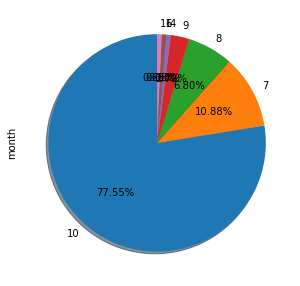

In [13]:
plt.figure(figsize=(18,12))
result['month'].value_counts().plot.pie(figsize=(5, 5),autopct='%1.2f%%',  shadow=True, startangle=90)



October has the highest ridership in about two thirds of the station, while July came second with the highest ridership in about 11 percent of the station

In [14]:
dic={}
station_names=df.stationname.unique().tolist() # A list of unique station names through which we loop
for name in station_names:
    i=ff[ff['stationname']==name]['rides'].argmin()
    dic[name]=ff[ff['stationname']==name]['month'].iloc[i]
    
result= pd.DataFrame({'stationname':list(dic.keys()), 'month':list(dic.values())})

<AxesSubplot:ylabel='month'>

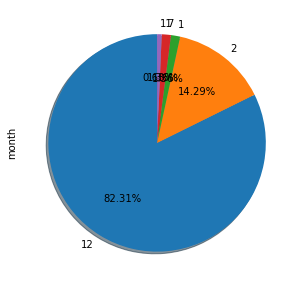

In [15]:
plt.figure(figsize=(18,12))
result['month'].value_counts().plot.pie(figsize=(5, 5),autopct='%1.2f%%',  shadow=True, startangle=90)


About 82 percent of the stations experienced the lowest ridership in December while February has the least ridership in about 14 percent of the stations. 

### Which station is busier: O'Hare aIrport or Midway airport?

To be fair and before the overall ridership for both the stations is compared, we need to ensure that the stations have the same data size. 

In [16]:
# Size of OHare Airport dataset
O=df[df['stationname']=='OHare Airport']
O.shape

(5813, 7)

In [17]:
# Size of Midway Airport dataset
M=df[df['stationname']=='Midway Airport']
M.shape

(5814, 7)

As can be seen above, the O'Hare Airport's dataset is one record larger than  the Midway Airport's dataset. Let's check if the two datasets have identical date columns. 

In [18]:
# Sort the date column of each station dataframe and convert it to a list
date_O=df[df['stationname']=='OHare Airport'].date.sort_values().astype(str).tolist()
date_M=df[df['stationname']=='Midway Airport'].date.sort_values().astype(str).tolist()

### Are they identical?

In [19]:
date_O==date_M

False

No, they are not identical. As the O'Hare Airport dataset is larger by one record, there might have been a duplicated date value. We will now find that date value

In [20]:
L=[]
for i , j in zip(date_O,date_M):
    if i!=j:
        L.append((i,j))
       

In [21]:
L[0:3]

[('2011-08-11', '2011-08-10'),
 ('2011-08-12', '2011-08-11'),
 ('2011-08-13', '2011-08-12')]

I can see here that '2011-08-10' is duplicated in the Midway Airport dataset. Let us show now the Midway Airport dataset for the date value of '2011-08-08'.

In [22]:
df[(df['stationname']=='Midway Airport')&(df['date']==datetime(2011,8,10))]

,station_id,stationname,date,daytype,rides,year,month
549625,40930,Midway Airport,2011-08-10,W,8907,2011,8
549626,40930,Midway Airport,2011-08-10,W,8908,2011,8


It is extremly obvious that the record corresponding to '2011-08-08' is duplicated. The rides value for these records differ by 1. One of these  records needs to be removed. Let's remove the row with the index value of 549625. 

In [23]:
df.drop(index=549625,  inplace=True)

In [24]:
# Size of OHare Airport dataset
O=df[df['stationname']=='OHare Airport']
# Size of Midway Airport dataset
M=df[df['stationname']=='Midway Airport']
print(O.shape, M.shape)

(5813, 7) (5813, 7)


### The total rides at OHare Airport and Midway Airport over the study period 

In [25]:
df[df['stationname']=='OHare Airport']['rides'].agg('sum')

52146279

In [26]:
df[df['stationname']=='Midway Airport']['rides'].agg('sum')

42649715

The O'Hare Airport is busier than Midway Airport station.

In [27]:
df_airport=df[(df['stationname']=='OHare Airport') | (df['stationname']=='Midway Airport')].groupby(['stationname','year'])['rides'].agg('sum').reset_index()
df_airport.head()

,stationname,year,rides
0,Midway Airport,2001,2358665
1,Midway Airport,2002,2390529
2,Midway Airport,2003,2490985
3,Midway Airport,2004,2535682
4,Midway Airport,2005,2671691


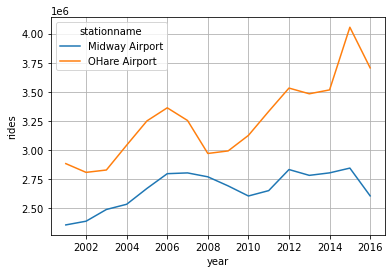

In [35]:
sns.lineplot(x='year',y='rides', hue='stationname', data=df_airport)
plt.grid(True)

The figure above shows how the yearly average ridership rouphly goes up and down the same for both stations.  Also, it demonstrates that the number of passengers whyo entered the O'Hare Airport station is higher than that of passengers who entered the Midway Airport station between 2001 and 2016

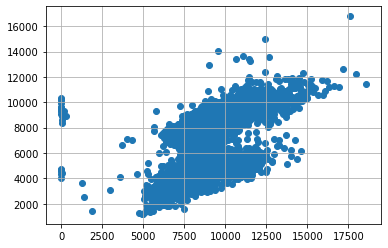

In [31]:
x=df[df['stationname']=='OHare Airport']['rides']
y=df[df['stationname']=='Midway Airport']['rides']
plt.scatter(x,y)
plt.grid(True)

In [42]:
df[(df['stationname']=='OHare Airport')&(df['rides']<1000)]

,station_id,stationname,date,daytype,rides,year,month
62160,40890,OHare Airport,2002-03-15,W,22,2002,3
62302,40890,OHare Airport,2002-03-16,A,0,2002,3
389754,40890,OHare Airport,2008-07-08,W,174,2008,7
389896,40890,OHare Airport,2008-07-09,W,0,2008,7
390038,40890,OHare Airport,2008-07-10,W,0,2008,7
390180,40890,OHare Airport,2008-07-11,W,0,2008,7
390322,40890,OHare Airport,2008-07-12,A,0,2008,7
390464,40890,OHare Airport,2008-07-13,U,0,2008,7
390606,40890,OHare Airport,2008-07-14,W,0,2008,7
390748,40890,OHare Airport,2008-07-15,W,0,2008,7


The table shows that there were no entries to the O'Hare Airport station between 9th of July and 23rd of July 2008. The station could be closed for some reasons and the figures shows that it was not operating normally over that period. Those days should be excluded from the dataset. 

### Computing correlation
To measure if the riderships of the two airport stations grow together,  the Spearman rank correlation coefficient is used. 

In [32]:
from scipy.stats import spearmanr

(correlation, pValue) = spearmanr(x, y)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.7118715320304316
It is statistically significant.
